In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import math
from sklearn.metrics import mean_squared_error

## Membaca data set


In [2]:
df = pd.read_csv("historical_weather.csv")
df

point   prediction_date  wind_speed_100m  wind_direction_100m  \
0           1  01/01/2014 12:00             13.6                210.3   
1           1  01/01/2014 13:00             13.6                210.0   
2           1  01/01/2014 14:00             13.6                209.8   
3           1  01/01/2014 15:00             13.6                209.6   
4           1  01/01/2014 16:00             13.8                218.2   
5           1  01/01/2014 17:00             14.1                226.9   
6           1  01/01/2014 18:00             14.3                235.6   
7           1  01/01/2014 19:00             13.7                239.6   
8           1  01/01/2014 20:00             13.2                243.7   
9           1  01/01/2014 21:00             12.7                247.8   
10          1  01/01/2014 22:00             12.1                247.1   
11          1  01/01/2014 23:00             11.4                246.5   
12          1  02/01/2014 00:00             10.8                245.9   
13          1  02/01/2014 01:00             10.6                240.9   
14          1  02/01/2014 02:00             10.5                236.0   
15          1  02/01/2014 03:00             10.3                231.0   
16          1  02/01/2014 04:00              9.9                223.1   
17          1  02/01/2014 05:00              9.6                215.1   
18          1  02/01/2014 06:00              9.2                207.2   
19          1  02/01/2014 07:00              8.3                200.4   
20          1  02/01/2014 08:00              7.4                193.6   
21          1  02/01/2014 09:00              6.5                186.9   
22          1  02/01/2014 10:00              6.4                188.0   
23          1  02/01/2014 11:00              6.3                189.1   
24          1  02/01/2014 12:00              7.6                192.9   
25          1  02/01/2014 13:00              7.9                195.2   
26          1  02/01/2014 14:00              8.2                197.4   
27          1  02/01/2014 15:00              8.5                199.6   
28          1  02/01/2014 16:00              8.8                213.9   
29          1  02/01/2014 17:00              9.2                228.2   
...       ...               ...              ...                  ...   
272562     18  18/10/2015 06:00              5.8                185.9   
272563     18  18/10/2015 07:00              5.0                191.0   
272564     18  18/10/2015 08:00              4.2                196.1   
272565     18  18/10/2015 09:00              3.3                201.2   
272566     18  18/10/2015 10:00              2.8                233.5   
272567     18  18/10/2015 11:00              2.2                265.8   
272568     18  18/10/2015 12:00              1.6                299.7   
272569     18  18/10/2015 13:00              1.5                319.8   
272570     18  18/10/2015 14:00              1.4                339.9   
272571     18  18/10/2015 15:00              1.3                360.0   
272572     18  18/10/2015 16:00              1.5                291.1   
272573     18  18/10/2015 17:00              1.6                222.3   
272574     18  18/10/2015 18:00              1.8                153.4   
272575     18  18/10/2015 19:00              2.0                157.6   
272576     18  18/10/2015 20:00              2.2                161.8   
272577     18  18/10/2015 21:00              2.5                166.0   
272578     18  18/10/2015 22:00              2.4                173.1   
272579     18  18/10/2015 23:00              2.4                180.3   
272580     18  19/10/2015 00:00              2.3                187.4   
272581     18  19/10/2015 01:00              2.0                174.9   
272582     18  19/10/2015 02:00              1.7                162.3   
272583     18  19/10/2015 03:00              1.4                149.7   
272584     18  19/10/2015 04:00              1.5                15

## Mengambil di daerah 1

In [3]:
data =  df.loc[df["point"]==5]
data

point   prediction_date  wind_speed_100m  wind_direction_100m  \
60576      5  01/01/2014 12:00             10.3                205.8   
60577      5  01/01/2014 13:00             10.1                205.2   
60578      5  01/01/2014 14:00              9.8                204.5   
60579      5  01/01/2014 15:00              9.5                203.9   
60580      5  01/01/2014 16:00              9.7                202.5   
60581      5  01/01/2014 17:00              9.9                201.1   
60582      5  01/01/2014 18:00             10.0                199.7   
60583      5  01/01/2014 19:00              9.5                205.2   
60584      5  01/01/2014 20:00              9.0                210.8   
60585      5  01/01/2014 21:00              8.4                216.3   
60586      5  01/01/2014 22:00              7.9                220.0   
60587      5  01/01/2014 23:00              7.3                223.7   
60588      5  02/01/2014 00:00              6.8                227.3   
60589      5  02/01/2014 01:00              6.1                222.0   
60590      5  02/01/2014 02:00              5.4                216.6   
60591      5  02/01/2014 03:00              4.6                211.3   
60592      5  02/01/2014 04:00              4.9                206.2   
60593      5  02/01/2014 05:00              5.1                201.2   
60594      5  02/01/2014 06:00              5.4                196.2   
60595      5  02/01/2014 07:00              5.5                190.5   
60596      5  02/01/2014 08:00              5.7                184.9   
60597      5  02/01/2014 09:00              5.9                179.2   
60598      5  02/01/2014 10:00              5.7                180.8   
60599      5  02/01/2014 11:00              5.6                182.4   
60600      5  02/01/2014 12:00              5.9                184.4   
60601      5  02/01/2014 13:00              6.2                187.1   
60602      5  02/01/2014 14:00              6.6                189.7   
60603      5  02/01/2014 15:00              6.9                192.4   
60604      5  02/01/2014 16:00              6.9                189.0   
60605      5  02/01/2014 17:00              6.8                185.5   
...      ...               ...              ...                  ...   
75690      5  18/10/2015 06:00              3.8                154.8   
75691      5  18/10/2015 07:00              3.4                148.7   
75692      5  18/10/2015 08:00              3.0                142.6   
75693      5  18/10/2015 09:00              2.6                136.5   
75694      5  18/10/2015 10:00              2.7                142.2   
75695      5  18/10/2015 11:00              2.8                147.8   
75696      5  18/10/2015 12:00              3.2                147.8   
75697      5  18/10/2015 13:00              3.0                138.1   
75698      5  18/10/2015 14:00              2.7                128.3   
75699      5  18/10/2015 15:00              2.5                118.6   
75700      5  18/10/2015 16:00              2.6                109.8   
75701      5  18/10/2015 17:00              2.6                101.0   
75702      5  18/10/2015 18:00              2.7                 92.1   
75703      5  18/10/2015 19:00              2.6                 81.5   
75704      5  18/10/2015 20:00              2.5                 70.9   
75705      5  18/10/2015 21:00              2.4                 60.3   
75706      5  18/10/2015 22:00              2.7                 48.8   
75707      5  18/10/2015 23:00              3.0                 37.3   
75708      5  19/10/2015 00:00              3.2                 25.8   
75709      5  19/10/2015 01:00              3.3                 45.5   
75710      5  19/10/2015 02:00              3.3                 65.2   
75711      5  19/10/2015 03:00              3.4                 85.0   
75712      5  19/10/2015 04:00              3.2                 99.1   
75713      5  19/10/2015 05:00              2.9

## Menghapus Column point 

karena tidak dibutuhkan lagi

In [4]:
clean = data.set_index('prediction_date')
clean = clean.drop(['point'], axis=1)
clean

wind_speed_100m  wind_direction_100m  temperature  \
prediction_date                                                       
01/01/2014 12:00             10.3                205.8          5.1   
01/01/2014 13:00             10.1                205.2          4.9   
01/01/2014 14:00              9.8                204.5          4.8   
01/01/2014 15:00              9.5                203.9          4.7   
01/01/2014 16:00              9.7                202.5          4.2   
01/01/2014 17:00              9.9                201.1          3.9   
01/01/2014 18:00             10.0                199.7          3.5   
01/01/2014 19:00              9.5                205.2          3.6   
01/01/2014 20:00              9.0                210.8          3.8   
01/01/2014 21:00              8.4                216.3          4.0   
01/01/2014 22:00              7.9                220.0          4.0   
01/01/2014 23:00              7.3                223.7          4.0   
02/01/2014 00:00              6.8                227.3          4.1   
02/01/2014 01:00              6.1                222.0          3.8   
02/01/2014 02:00              5.4                216.6          3.6   
02/01/2014 03:00              4.6                211.3          3.4   
02/01/2014 04:00              4.9                206.2          3.3   
02/01/2014 05:00              5.1                201.2          3.2   
02/01/2014 06:00              5.4                196.2          3.2   
02/01/2014 07:00              5.5                190.5          3.1   
02/01/2014 08:00              5.7                184.9          3.0   
02/01/2014 09:00              5.9                179.2          3.0   
02/01/2014 10:00              5.7                180.8          4.3   
02/01/2014 11:00              5.6                182.4          5.6   
02/01/2014 12:00              5.9                184.4          6.0   
02/01/2014 13:00              6.2                187.1          6.2   
02/01/2014 14:00              6.6                189.7          6.4   
02/01/2014 15:00              6.9                192.4          6.7   
02/01/2014 16:00              6.9                189.0          6.4   
02/01/2014 17:00              6.8                185.5          6.1   
...                           ...                  ...          ...   
18/10/2015 06:00              3.8                154.8          6.0   
18/10/2015 07:00              3.4                148.7          6.6   
18/10/2015 08:00              3.0                142.6          7.3   
18/10/2015 09:00              2.6                136.5          8.0   
18/10/2015 10:00              2.7                142.2         10.2   
18/10/2015 11:00              2.8                147.8         12.5   
18/10/2015 12:00              3.2                147.8         14.2   
18/10/2015 13:00              3.0                138.1         13.9   
18/10/2015 14:00              2.7                128.3         13.7   
18/10/2015 15:00              2.5                118.6         13.5   
18/10/2015 16:00              2.6                109.8         11.6   
18/10/2015 17:00              2.6                101.0          9.8   
18/10/2015 18:00              2.7                 92.1          8.0   
18/10/2015 19:00              2.6                 81.5          8.0   
18/10/2015 20:00              2.5                 70.9          8.1   
18/10/2015 21:00              2.4                 60.3          8.2   
18/10/2015 22:00              2.7                 48.8          8.3   
18/10/2015 23:00              3.0                 37.3          8.4   
19/10/2015 00:00              3.2                 25.8          8.5   
19/10/2015 01:00              3.3                 45.5          8.6   
19/10/2015 02:00              3.3                 65.2          8.8   
19/10/2015 03:00              3.4                 85.0          9.0   
19/10/2015 04:00              3.2                 99.1          9.0   
19/10/2015 05:00              2.9         

## Visual data sementara

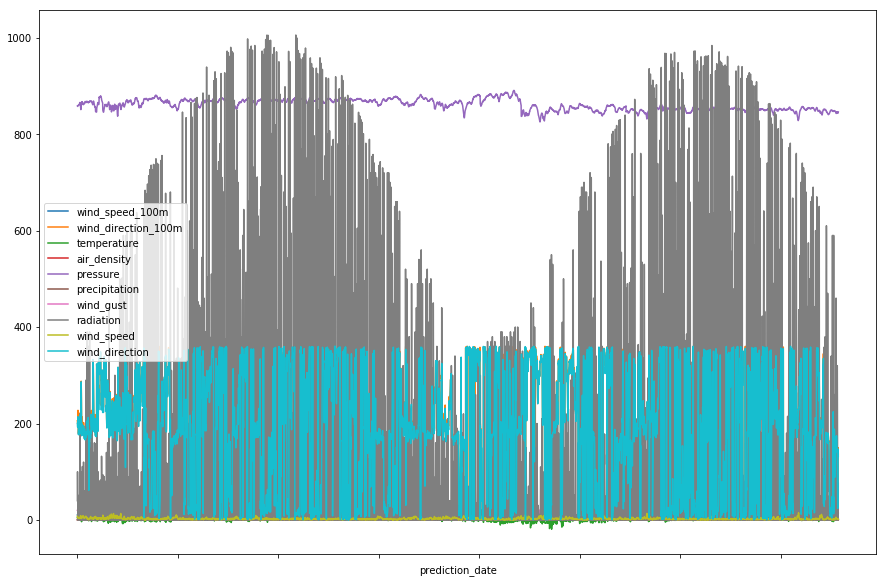

In [5]:
clean.plot(figsize=(15,10))
plt.show()

## Mengurutkan Colom

In [6]:
df = clean[['wind_speed_100m','wind_direction_100m','temperature','air_density','pressure','wind_gust','radiation','wind_speed','wind_direction','precipitation']]
df

wind_speed_100m  wind_direction_100m  temperature  \
prediction_date                                                       
01/01/2014 12:00             10.3                205.8          5.1   
01/01/2014 13:00             10.1                205.2          4.9   
01/01/2014 14:00              9.8                204.5          4.8   
01/01/2014 15:00              9.5                203.9          4.7   
01/01/2014 16:00              9.7                202.5          4.2   
01/01/2014 17:00              9.9                201.1          3.9   
01/01/2014 18:00             10.0                199.7          3.5   
01/01/2014 19:00              9.5                205.2          3.6   
01/01/2014 20:00              9.0                210.8          3.8   
01/01/2014 21:00              8.4                216.3          4.0   
01/01/2014 22:00              7.9                220.0          4.0   
01/01/2014 23:00              7.3                223.7          4.0   
02/01/2014 00:00              6.8                227.3          4.1   
02/01/2014 01:00              6.1                222.0          3.8   
02/01/2014 02:00              5.4                216.6          3.6   
02/01/2014 03:00              4.6                211.3          3.4   
02/01/2014 04:00              4.9                206.2          3.3   
02/01/2014 05:00              5.1                201.2          3.2   
02/01/2014 06:00              5.4                196.2          3.2   
02/01/2014 07:00              5.5                190.5          3.1   
02/01/2014 08:00              5.7                184.9          3.0   
02/01/2014 09:00              5.9                179.2          3.0   
02/01/2014 10:00              5.7                180.8          4.3   
02/01/2014 11:00              5.6                182.4          5.6   
02/01/2014 12:00              5.9                184.4          6.0   
02/01/2014 13:00              6.2                187.1          6.2   
02/01/2014 14:00              6.6                189.7          6.4   
02/01/2014 15:00              6.9                192.4          6.7   
02/01/2014 16:00              6.9                189.0          6.4   
02/01/2014 17:00              6.8                185.5          6.1   
...                           ...                  ...          ...   
18/10/2015 06:00              3.8                154.8          6.0   
18/10/2015 07:00              3.4                148.7          6.6   
18/10/2015 08:00              3.0                142.6          7.3   
18/10/2015 09:00              2.6                136.5          8.0   
18/10/2015 10:00              2.7                142.2         10.2   
18/10/2015 11:00              2.8                147.8         12.5   
18/10/2015 12:00              3.2                147.8         14.2   
18/10/2015 13:00              3.0                138.1         13.9   
18/10/2015 14:00              2.7                128.3         13.7   
18/10/2015 15:00              2.5                118.6         13.5   
18/10/2015 16:00              2.6                109.8         11.6   
18/10/2015 17:00              2.6                101.0          9.8   
18/10/2015 18:00              2.7                 92.1          8.0   
18/10/2015 19:00              2.6                 81.5          8.0   
18/10/2015 20:00              2.5                 70.9          8.1   
18/10/2015 21:00              2.4                 60.3          8.2   
18/10/2015 22:00              2.7                 48.8          8.3   
18/10/2015 23:00              3.0                 37.3          8.4   
19/10/2015 00:00              3.2                 25.8          8.5   
19/10/2015 01:00              3.3                 45.5          8.6   
19/10/2015 02:00              3.3                 65.2          8.8   
19/10/2015 03:00              3.4                 85.0          9.0   
19/10/2015 04:00              3.2                 99.1          9.0   
19/10/2015 05:00              2.9         

In [7]:
cols = df.columns
cols

Index(['wind_speed_100m', 'wind_direction_100m', 'temperature', 'air_density',
       'pressure', 'wind_gust', 'radiation', 'wind_speed', 'wind_direction',
       'precipitation'],
      dtype='object')

## Untuk Menentukan Vector Error Correction Model

In [8]:
coint_johansen(df,-1,1).eig

array([2.51698064e-01, 2.31338245e-01, 1.83133394e-01, 8.56008754e-02,
       7.61836764e-02, 5.04440145e-02, 3.40644389e-02, 1.89341289e-02,
       1.81352312e-02, 3.74676281e-06])

## Membagi Training dan Testing

In [9]:
train = df[:int(0.8*(len(df)))]
train

wind_speed_100m  wind_direction_100m  temperature  \
prediction_date                                                       
01/01/2014 12:00             10.3                205.8          5.1   
01/01/2014 13:00             10.1                205.2          4.9   
01/01/2014 14:00              9.8                204.5          4.8   
01/01/2014 15:00              9.5                203.9          4.7   
01/01/2014 16:00              9.7                202.5          4.2   
01/01/2014 17:00              9.9                201.1          3.9   
01/01/2014 18:00             10.0                199.7          3.5   
01/01/2014 19:00              9.5                205.2          3.6   
01/01/2014 20:00              9.0                210.8          3.8   
01/01/2014 21:00              8.4                216.3          4.0   
01/01/2014 22:00              7.9                220.0          4.0   
01/01/2014 23:00              7.3                223.7          4.0   
02/01/2014 00:00              6.8                227.3          4.1   
02/01/2014 01:00              6.1                222.0          3.8   
02/01/2014 02:00              5.4                216.6          3.6   
02/01/2014 03:00              4.6                211.3          3.4   
02/01/2014 04:00              4.9                206.2          3.3   
02/01/2014 05:00              5.1                201.2          3.2   
02/01/2014 06:00              5.4                196.2          3.2   
02/01/2014 07:00              5.5                190.5          3.1   
02/01/2014 08:00              5.7                184.9          3.0   
02/01/2014 09:00              5.9                179.2          3.0   
02/01/2014 10:00              5.7                180.8          4.3   
02/01/2014 11:00              5.6                182.4          5.6   
02/01/2014 12:00              5.9                184.4          6.0   
02/01/2014 13:00              6.2                187.1          6.2   
02/01/2014 14:00              6.6                189.7          6.4   
02/01/2014 15:00              6.9                192.4          6.7   
02/01/2014 16:00              6.9                189.0          6.4   
02/01/2014 17:00              6.8                185.5          6.1   
...                           ...                  ...          ...   
09/06/2015 01:00              1.5                 16.5         10.2   
09/06/2015 02:00              1.8                 25.2          9.8   
09/06/2015 03:00              2.0                 33.9          9.4   
09/06/2015 04:00              2.0                 32.1          9.5   
09/06/2015 05:00              2.0                 30.4          9.7   
09/06/2015 06:00              1.9                 28.7          9.9   
09/06/2015 07:00              2.3                 24.9         11.3   
09/06/2015 08:00              2.7                 21.1         12.8   
09/06/2015 09:00              3.2                 17.3         14.2   
09/06/2015 10:00              3.1                 20.2         14.5   
09/06/2015 11:00              3.0                 23.0         14.7   
09/06/2015 12:00              3.1                 24.9         16.2   
09/06/2015 13:00              3.2                 24.2         14.9   
09/06/2015 14:00              3.4                 23.4         13.6   
09/06/2015 15:00              3.5                 22.7         12.2   
09/06/2015 16:00              3.6                 19.9         11.6   
09/06/2015 17:00              3.7                 17.2         11.0   
09/06/2015 18:00              3.9                 14.4         10.4   
09/06/2015 19:00              4.1                 10.8          9.5   
09/06/2015 20:00              4.4                  7.1          8.7   
09/06/2015 21:00              4.7                  3.4          7.9   
09/06/2015 22:00              3.7                 10.4          7.6   
09/06/2015 23:00              2.8                 17.3          7.4   
10/06/2015 00:00              1.9         

In [10]:
valid = df[int(0.8*(len(df))):]
valid

wind_speed_100m  wind_direction_100m  temperature  \
prediction_date                                                       
10/06/2015 07:00              2.5                 22.7          6.8   
10/06/2015 08:00              2.5                 24.2          7.4   
10/06/2015 09:00              2.6                 25.8          8.0   
10/06/2015 10:00              2.4                 24.2          9.2   
10/06/2015 11:00              2.2                 22.6         10.4   
10/06/2015 12:00              1.0                 37.5         11.5   
10/06/2015 13:00              0.8                129.1         13.1   
10/06/2015 14:00              0.6                220.6         14.7   
10/06/2015 15:00              0.4                312.1         16.4   
10/06/2015 16:00              0.9                211.6         14.9   
10/06/2015 17:00              1.4                111.2         13.4   
10/06/2015 18:00              1.8                 10.7         12.0   
10/06/2015 19:00              1.7                 21.9         10.0   
10/06/2015 20:00              1.6                 33.0          8.0   
10/06/2015 21:00              1.5                 44.2          6.1   
10/06/2015 22:00              2.1                 88.2          5.3   
10/06/2015 23:00              2.7                132.2          4.5   
11/06/2015 00:00              3.2                176.3          3.7   
11/06/2015 01:00              3.4                176.7          3.6   
11/06/2015 02:00              3.6                177.1          3.5   
11/06/2015 03:00              3.8                177.6          3.4   
11/06/2015 04:00              4.1                174.3          4.5   
11/06/2015 05:00              4.3                171.0          5.7   
11/06/2015 06:00              4.6                167.7          6.9   
11/06/2015 07:00              4.5                169.0          9.6   
11/06/2015 08:00              4.3                170.2         12.4   
11/06/2015 09:00              4.2                171.5         15.2   
11/06/2015 10:00              4.1                178.8         17.0   
11/06/2015 11:00              4.1                186.2         18.8   
11/06/2015 12:00              3.2                191.3         21.7   
...                           ...                  ...          ...   
18/10/2015 06:00              3.8                154.8          6.0   
18/10/2015 07:00              3.4                148.7          6.6   
18/10/2015 08:00              3.0                142.6          7.3   
18/10/2015 09:00              2.6                136.5          8.0   
18/10/2015 10:00              2.7                142.2         10.2   
18/10/2015 11:00              2.8                147.8         12.5   
18/10/2015 12:00              3.2                147.8         14.2   
18/10/2015 13:00              3.0                138.1         13.9   
18/10/2015 14:00              2.7                128.3         13.7   
18/10/2015 15:00              2.5                118.6         13.5   
18/10/2015 16:00              2.6                109.8         11.6   
18/10/2015 17:00              2.6                101.0          9.8   
18/10/2015 18:00              2.7                 92.1          8.0   
18/10/2015 19:00              2.6                 81.5          8.0   
18/10/2015 20:00              2.5                 70.9          8.1   
18/10/2015 21:00              2.4                 60.3          8.2   
18/10/2015 22:00              2.7                 48.8          8.3   
18/10/2015 23:00              3.0                 37.3          8.4   
19/10/2015 00:00              3.2                 25.8          8.5   
19/10/2015 01:00              3.3                 45.5          8.6   
19/10/2015 02:00              3.3                 65.2          8.8   
19/10/2015 03:00              3.4                 85.0          9.0   
19/10/2015 04:00              3.2                 99.1          9.0   
19/10/2015 05:00              2.9         

## Fit Model

In [11]:
model = VAR(endog=train)
model_fit = model.fit()
model_fit.summary()

/home/ntil/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Mar, 2019
Time:                     10:14:08
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -5.29499
Nobs:                     12114.0    HQIC:                  -5.33967
Log likelihood:          -139301.    FPE:                 0.00469056
AIC:                     -5.36220    Det(Omega_mle):      0.00464818
--------------------------------------------------------------------
Results for equation wind_speed_100m
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          1.232056         0.371532            3.316           0.001
L1.wind_speed_100m             0.971310         0.010353           93.816           0.000
L1.wind_direct

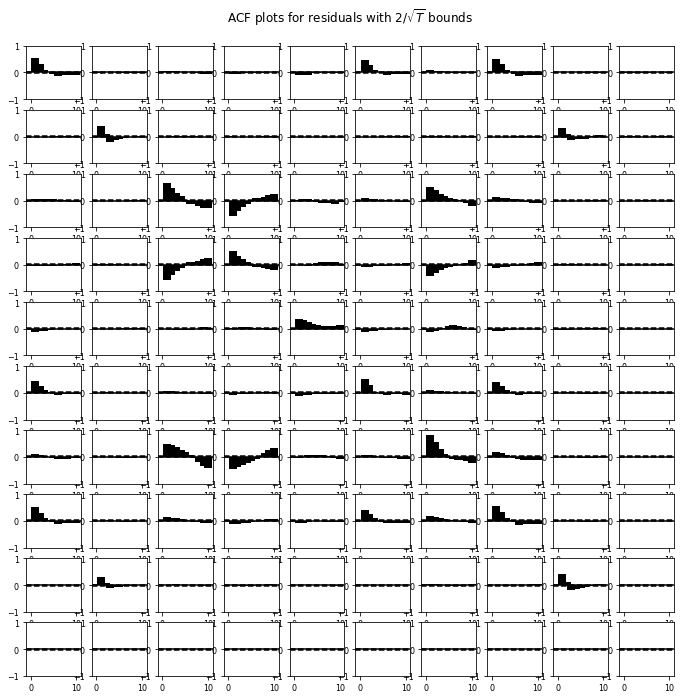

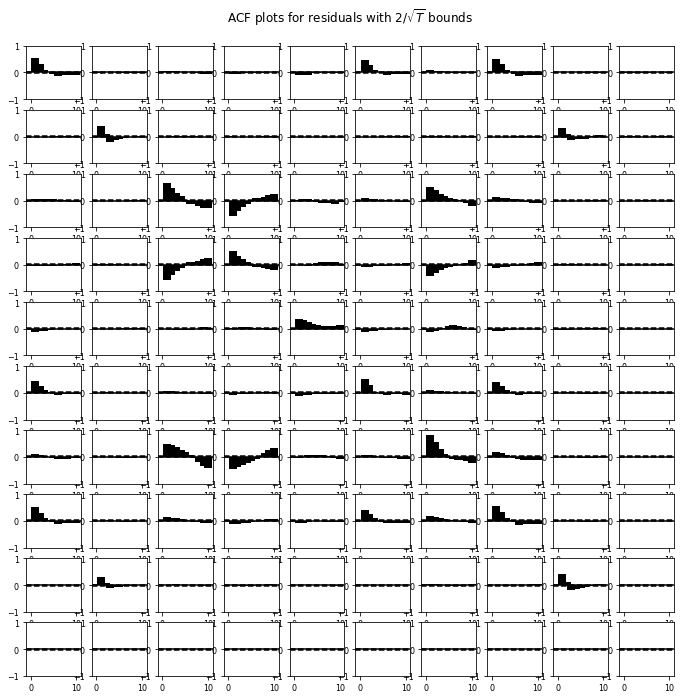

In [12]:
model_fit.plot_acorr()

## Validasi

In [13]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))
prediction

array([[2.55019177e+00, 2.84964558e+01, 6.99744848e+00, ...,
        1.96242137e+00, 2.33487945e+01, 2.96199754e-01],
       [2.59262130e+00, 3.53683165e+01, 7.64361537e+00, ...,
        2.01159345e+00, 3.17331207e+01, 2.93083618e-01],
       [2.63320042e+00, 4.18811163e+01, 8.20595870e+00, ...,
        2.05536887e+00, 3.93892505e+01, 2.90174187e-01],
       ...,
       [4.05954682e+00, 1.90474178e+02, 6.06822710e+00, ...,
        2.82210547e+00, 1.91415855e+02, 1.31735131e-01],
       [4.05948021e+00, 1.90473122e+02, 6.06837100e+00, ...,
        2.82206472e+00, 1.91414685e+02, 1.31734452e-01],
       [4.05941367e+00, 1.90472067e+02, 6.06851475e+00, ...,
        2.82202402e+00, 1.91413516e+02, 1.31733773e-01]])

## Mencari Root Mean Square Error

In [14]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,10):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for wind_speed_100m is :  2.814929839483361
rmse value for wind_direction_100m is :  119.67348298465853
rmse value for temperature is :  10.128680493613937
rmse value for air_density is :  0.0421362070112481
rmse value for pressure is :  9.445416636828947
rmse value for wind_gust is :  3.9608183309879084
rmse value for radiation is :  294.05483630741014
rmse value for wind_speed is :  1.8126359007680217
rmse value for wind_direction is :  123.55791351578944
rmse value for precipitation is :  0.26689183019998985


## Prediksi

In [24]:
model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=50)
print(yhat)

[[2.44083350e+00 1.39141255e+02 1.40943724e+01 1.02625646e+00
  8.46068932e+02 2.56933256e+00 1.13071731e+02 1.76053318e+00
  1.36126387e+02 5.21609156e-03]
 [2.47872340e+00 1.41820440e+02 1.46833254e+01 1.02376831e+00
  8.46041065e+02 2.62866604e+00 1.47571495e+02 1.81356696e+00
  1.39553685e+02 1.03622585e-02]
 [2.51529844e+00 1.44144965e+02 1.51873821e+01 1.02180407e+00
  8.46015155e+02 2.68204356e+00 1.80173193e+02 1.86190199e+00
  1.42462871e+02 1.53105896e-02]
 [2.55084417e+00 1.46132679e+02 1.56112366e+01 1.02019224e+00
  8.45991024e+02 2.73045420e+00 2.10947754e+02 1.90618719e+00
  1.44928796e+02 2.00401406e-02]
 [2.58534891e+00 1.47805390e+02 1.59566186e+01 1.01888998e+00
  8.45968721e+02 2.77421081e+00 2.39742956e+02 1.94660142e+00
  1.47000178e+02 2.45548565e-02]
 [2.61874852e+00 1.49186898e+02 1.62252345e+01 1.01788215e+00
  8.45948332e+02 2.81350382e+00 2.66388585e+02 1.98324470e+00
  1.48718331e+02 2.88642601e-02]
 [2.65098297e+00 1.50302139e+02 1.64193799e+01 1.01715784e

/home/ntil/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
data = pd.DataFrame(yhat,columns=['wind_speed_100m','wind_direction_100m','temperature','air_density','pressure','wind_gust','radiation','wind_speed','wind_direction','precipitation'])
data

wind_speed_100m  wind_direction_100m  temperature  air_density  \
0          2.440833           139.141255    14.094372     1.026256   
1          2.478723           141.820440    14.683325     1.023768   
2          2.515298           144.144965    15.187382     1.021804   
3          2.550844           146.132679    15.611237     1.020192   
4          2.585349           147.805390    15.956619     1.018890   
5          2.618749           149.186898    16.225235     1.017882   
6          2.650983           150.302139    16.419380     1.017158   
7          2.682008           151.176636    16.542004     1.016705   
8          2.711799           151.836066    16.596646     1.016511   
9          2.740347           152.305892    16.587352     1.016558   
10         2.767657           152.611049    16.518574     1.016832   
11         2.793752           152.775677    16.395086     1.017312   
12         2.818665           152.822902    16.221895     1.017981   
13         2.842439           152.774648    16.004161     1.018818   
14         2.865128           152.651496    15.747126     1.019804   
15         2.886790           152.472567    15.456038     1.020918   
16         2.907494           152.255448    15.136097     1.022141   
17         2.927309           152.016133    14.792393     1.023454   
18         2.946309           151.768998    14.429860     1.024838   
19         2.964569           151.526802    14.053232     1.026274   
20         2.982166           151.300694    13.667005     1.027746   
21         2.999175           151.100256    13.275409     1.029238   
22         3.015672           150.933547    12.882382     1.030735   
23         3.031727           150.807169    12.491548     1.032223   
24         3.047411           150.726338    12.106210     1.033690   
25         3.062790           150.694970    11.729336     1.035124   
26         3.077925           150.715768    11.363555     1.036516   
27         3.092874           150.790320    11.011160     1.037856   
28         3.107689           150.919195    10.674109     1.039138   
29         3.122418           151.102045    10.354037     1.040356   
30         3.137103           151.337708    10.052259     1.041504   
31         3.151782           151.624307     9.769790     1.042579   
32         3.166486           151.959350     9.507359     1.043577   
33         3.181243           152.339827     9.265421     1.044498   
34         3.196073           152.762302     9.044185     1.045340   
35         3.210995           153.223004     8.843626     1.046104   
36         3.226020           153.717909     8.663507     1.046791   
37         3.241155           154.242817     8.503404     1.047402   
38         3.256406           154.793431     8.362726     1.047939   
39         3.271771           155.365415     8.240732     1.048406   
40         3.287247           155.954464     8.136560     1.048805   
41         3.302827           156.556349     8.049239     1.049141   
42         3.318502           157.166971     7.977717     1.049417   
43         3.334259           157.782401     7.920873     1.049638   
44         3.350086           158.398915     7.877540     1.049807   
45         3.365965           159.013022     7.846521     1.049931   
46         3.381880           159.621490     7.826604     1.050012   
47         3.397813           160.221364     7.816574     1.050057   
48         3.413743           160.809977     7.815233     1.050068   
49         3.429653           161.384961     7.821405     1.050052   

      pressure  wind_gust   radiation  wind_speed  wind_direction  \
0   846.068932   2.569333  113.071731    1.760533      136.126387   
1   846.041065   2.628666  147.571495    1.813567      139.553685   
2   846.015155   2.682044  180.173193    1.861902      142.462871   
3   845.991024   2.730454  210.947754    1.906187      144.928796   
4   845.968721   2.774211  239.742956    1.946601      147.000178   
5   845.948332   2.

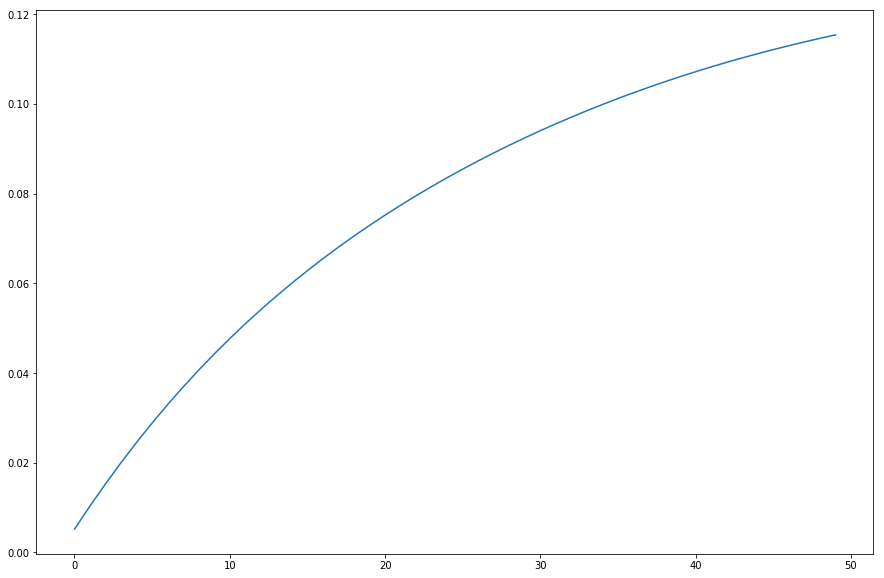

In [26]:
prediksi = data['precipitation']
prediksi.plot(figsize=(15,10))
plt.show()

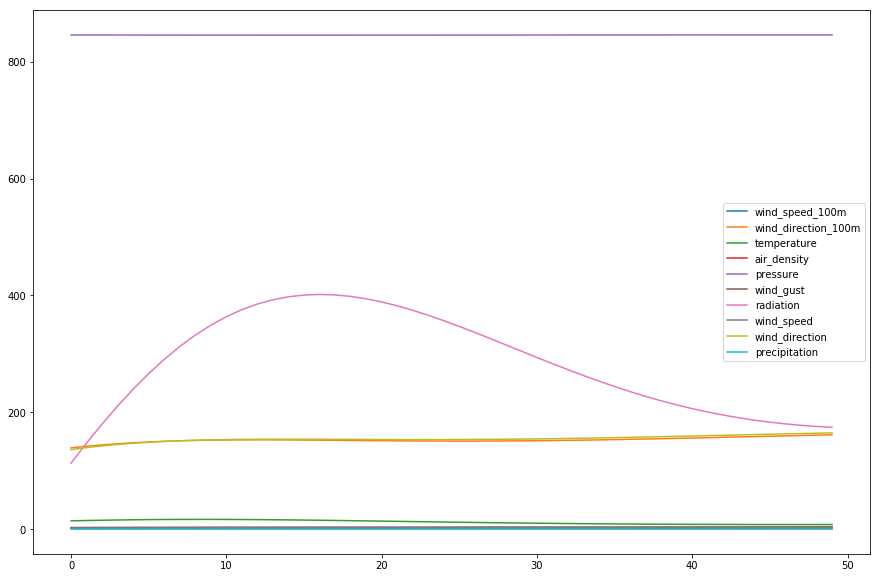

In [27]:
data.plot(figsize=(15,10))
plt.show()